<a href="https://colab.research.google.com/github/2350611h/azure-openai-test/blob/main/B3_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. データの読み込み

### 1-1. データのアップロード
データのサイズが小さい場合は files.upload() が利用できます。
データのサイズが大きい場合はファイル領域にドラッグ＆ドロップでアップロードします。

In [34]:
from google.colab import files
uploaded = files.upload()

Saving 2023_japan_baseball.csv to 2023_japan_baseball (2).csv


### 1-2. データの読み込み

In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

下のindex_col と header にはそれぞれ1列目（index_col）と1行目（header）にラベルが入っているかどうかを指定します。ラベルが入っている場合はラベルの入っている列・行の番号（1行目1列目が0，以下2行目2列目が1...）を，ラベルが入っていない場合は「None」を指定します。

In [36]:
data = pd.read_csv("2023_japan_baseball.csv", index_col=None, header=0)

In [37]:
data.head()

,Unnamed: 0,打率,出塁率,長打率,打数,得点,打点,安打,一塁打,二塁打,...,完投,完封,投球回,失点,自責点,被安打,被本塁打,奪三振,与四球,与死球
0,阪神,0.247,0.322,0.352,4775,555,534,1180,883,179,...,10,6,1286.6,-424,-381,-1105,-88,1009,-315,-42
1,広島,0.246,0.304,0.357,4728,493,476,1165,854,197,...,9,7,1272.9,-508,-454,-1187,-109,975,-400,-43
2,DeNA,0.247,0.305,0.369,4783,520,503,1182,829,230,...,10,3,1285.6,-496,-452,-1206,-118,1158,-359,-43
3,巨人,0.252,0.308,0.402,4826,523,511,1218,836,204,...,8,3,1275.4,-507,-482,-1117,-129,1075,-401,-64
4,ヤクルト,0.239,0.310,0.367,4712,534,509,1128,782,212,...,3,3,1264.4,-567,-516,-1215,-143,953,-382,-63


### 1-3. 文字列データの数値データへの変換
文字列データは今回利用する決定木では使えませんので，これを数値に変換します。

In [30]:
data['']   = data['weather'].map({'sunny':0, 'cloudy':1, 'rainy':2})
data['wind_val']      = data['wind'].map({'strong':1, 'weak':0})
data['play_golf_val'] = data['play_golf'].map({'yes':1, 'no':0})

KeyError: 'weather'

In [38]:
data.head()

,Unnamed: 0,打率,出塁率,長打率,打数,得点,打点,安打,一塁打,二塁打,...,完投,完封,投球回,失点,自責点,被安打,被本塁打,奪三振,与四球,与死球
0,阪神,0.247,0.322,0.352,4775,555,534,1180,883,179,...,10,6,1286.6,-424,-381,-1105,-88,1009,-315,-42
1,広島,0.246,0.304,0.357,4728,493,476,1165,854,197,...,9,7,1272.9,-508,-454,-1187,-109,975,-400,-43
2,DeNA,0.247,0.305,0.369,4783,520,503,1182,829,230,...,10,3,1285.6,-496,-452,-1206,-118,1158,-359,-43
3,巨人,0.252,0.308,0.402,4826,523,511,1218,836,204,...,8,3,1275.4,-507,-482,-1117,-129,1075,-401,-64
4,ヤクルト,0.239,0.310,0.367,4712,534,509,1128,782,212,...,3,3,1264.4,-567,-516,-1215,-143,953,-382,-63


### 1-4. 学習用データの作成
読み込んだデータから，学習用データを作成します。学習用データは入力（独立変数）と教師（正しい出力。目的変数の値）からなります。

データの作成方法としては a) 使うデータを指定する方法と b) 使わないデータを指定する方法の2種類があります。どちらも最終的には同じ結果になりますが。使うデータが少ない場合は a) が，使うデータが多い場合は b) が良いと思います。

a) 使うデータを指定する方法

In [40]:
features = ['打率', '盗塁', '犠飛', '失策'] # 使うデータのラベル
X = data[features]
Y = data['rank']

KeyError: 'rank'

b) 使わないデータを指定する方法

In [10]:
unused = ["weather", "wind", "play_golf", "play_golf_val"] # 使わないデータのラベル
X = data.drop(unused, axis=1)
Y = data["play_golf_val"]
features = X.keys().tolist()

## 2. 決定木の学習

### 2-1. 決定木オブジェクトの作成

In [11]:
clf = DecisionTreeClassifier()

### 2-2. 決定木の学習
独立変数Xに対する目的変数Yを用いて決定木を学習します。

In [12]:
clf.fit(X,Y)

DecisionTreeClassifier()

## 3. 可視化

### 3-1. 日本語フォントのインストール

In [13]:
!apt install fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 2s (29.9 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 3-2. GraphVizを用いた可視化

In [14]:
from sklearn import tree
import pydotplus.graphviz as gv
from IPython.display import Image

In [15]:
tree.export_graphviz(clf, out_file="play_golf.dot",
                     feature_names = features,
                     class_names=["no", "yes"])

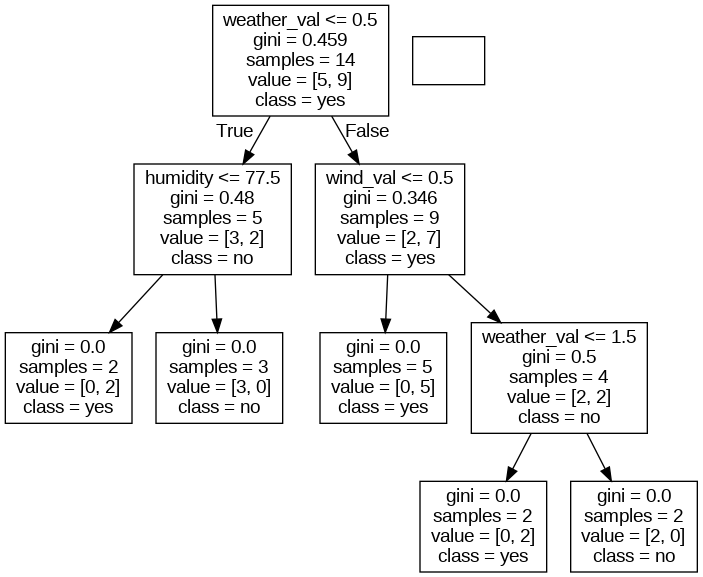

In [16]:
graph = gv.graph_from_dot_file("play_golf.dot")
Image(graph.create_png())

In [17]:
clf.predict(X)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [18]:
clf.predict([[1,19,40,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])